### Dividing dataset in training and testing datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv( "../datasets/ads/Advertising.csv" )

In [3]:
a = np.random.randn( len(data) )

(array([ 1.,  1.,  9., 20., 43., 43., 41., 24., 10.,  8.]),
 array([-2.82575149, -2.30500515, -1.78425881, -1.26351248, -0.74276614,
        -0.22201981,  0.29872653,  0.81947286,  1.3402192 ,  1.86096553,
         2.38171187]),
 <a list of 10 Patch objects>)

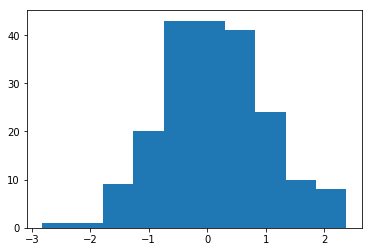

In [4]:
plt.hist(a)

In [5]:
# 80% of the dataset will be assigned for training, and 20% for validating the model

In [6]:
check = (a < 0.8)
training = data[check]
testing = data[~check]

In [9]:
import statsmodels.formula.api as smf
lm = smf.ols( formula="Sales~TV+Radio", data=training ).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     633.9
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           2.42e-75
Time:                        11:00:21   Log-Likelihood:                -307.52
No. Observations:                 158   AIC:                             621.0
Df Residuals:                     155   BIC:                             630.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7399      0.346      7.912      0.000       2.056       3.424
TV             0.0470      0.002     29.282      0.000       0.044       0.050
Radio          0.1850      0.009     20.152      0.000       0.167       0.203
==============================================================================
Omnibus:                       51.126   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.368
Skew:                          -1.368   Prob(JB):                     1.63e-27
Kurtosis:                       6.354   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.7399 + 0.0470 x TV + 0.1850 x Radio

## Validating model with the 'Testing' group

In [11]:
sales_pred = lm.predict( testing )
sales_pred

10      6.920200
17     23.294527
18      9.785666
20     18.131343
21     14.843118
23     16.598542
24      7.999683
27     17.116230
36     23.389984
40     16.384830
43     14.019936
54     20.417305
55     21.229548
59     18.102412
63     13.044076
67     11.970811
76      4.328631
78      8.525725
86     11.414536
90      9.959615
92     19.171532
98     24.184236
101    23.389089
102    17.780133
114    15.074668
121     7.638495
122    13.713670
127     6.509914
131    15.742898
138     9.553151
142    19.247649
146    15.377075
163    17.234266
164    10.968943
168    17.231752
170     7.236471
173    11.969616
182     6.436322
185    20.720725
186     9.686009
191     8.287155
195     5.220149
dtype: float64

In [12]:
SSD = sum(( testing["Sales"] - sales_pred )**2)
SSD

106.70401982613336

In [15]:
RSE = np.sqrt( SSD / (len(testing)-3) )
RSE

1.654086003919504

In [17]:
sales_mean = np.mean( testing["Sales"] )
error = RSE / sales_mean
error # The model leaves 11.52% unexplained

0.11519086745915962